In [1]:
#Data Manipulation
import numpy as np 
import pandas as pd
#Data Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.image as mplimg
%matplotlib inline
import seaborn as sns
import geopandas as gpd
from shapely import wkt
import folium
import folium.plugins
from folium.plugins import HeatMap

In [2]:
#Import dataset and understand the data
data1 = pd.read_csv('AB_NYC_2019.csv')
data1.head()

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

In [3]:
#Identify the null values
data1.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [4]:
#Rename the neighborhood group column to show the five different Boroughs of NYC
data1.rename(columns={'neighbourhood_group':'boroughs','neighbourhood':'neighborhood'}, inplace=True)

In [5]:
#Data Preprocessing
data1['reviews_per_month'].fillna(0,inplace = True)
data1['name'].fillna('places',inplace=True)
data1['host_name'].fillna('people',inplace=True)
data1.drop(['last_review'],axis=1,inplace=True)
data1.head()

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name   boroughs  neighborhood  latitude  longitude        room_type  \
0         John   Brooklyn    Kensington  40.64749  -73.97237     Private room   
1     Jennifer  Manhattan       Midtown  40.75362  -73.98377  Entire home/apt   
2    Elisabeth  Manhattan        Harlem  40.80902  -73.94190     Private room   
3  LisaRoxanne   Brooklyn  Clinton Hill  40.68514  -73.95976  Entire home/apt   
4        Laura  Manhattan   East Harlem  40.79851  -73.94399  Entire home/apt   

   price  minimum_nights  number_of_reviews  reviews_per_month  \
0    149               1                  9               0.21   
1    225               1                 45               0.38   
2    150               3                  0               0.00   
3     89               1                270               4.64   
4     80              10                  9               0.10   

   calculated_host_listings_count  availability_365  
0                               6               365  
1                               2               355  
2                               1               365  
3                               1               194  
4                               1                 0

In [6]:
#Basic Statistics of the data
data1.describe().T

count          mean           std  \
id                              48895.0  1.901714e+07  1.098311e+07   
host_id                         48895.0  6.762001e+07  7.861097e+07   
latitude                        48895.0  4.072895e+01  5.453008e-02   
longitude                       48895.0 -7.395217e+01  4.615674e-02   
price                           48895.0  1.527207e+02  2.401542e+02   
minimum_nights                  48895.0  7.029962e+00  2.051055e+01   
number_of_reviews               48895.0  2.327447e+01  4.455058e+01   
reviews_per_month               48895.0  1.090910e+00  1.597283e+00   
calculated_host_listings_count  48895.0  7.143982e+00  3.295252e+01   
availability_365                48895.0  1.127813e+02  1.316223e+02   

                                       min           25%           50%  \
id                              2539.00000  9.471945e+06  1.967728e+07   
host_id                         2438.00000  7.822033e+06  3.079382e+07   
latitude                          40.49979  4.069010e+01  4.072307e+01   
longitude                        -74.24442 -7.398307e+01 -7.395568e+01   
price                              0.00000  6.900000e+01  1.060000e+02   
minimum_nights                     1.00000  1.000000e+00  3.000000e+00   
number_of_reviews                  0.00000  1.000000e+00  5.000000e+00   
reviews_per_month                  0.00000  4.000000e-02  3.700000e-01   
calculated_host_listings_count     1.00000  1.000000e+00  1.000000e+00   
availability_365                   0.00000  0.000000e+00  4.500000e+01   

                                         75%           max  
id                              2.915218e+07  3.648724e+07  
host_id                         1.074344e+08  2.743213e+08  
latitude                        4.076311e+01  4.091306e+01  
longitude                      -7.393627e+01 -7.371299e+01  
price                           1.750000e+02  1.000000e+04  
minimum_nights                  5.000000e+00  1.250000e+03  
number_of_reviews               2.400000e+01  6.290000e+02  
reviews_per_month               1.580000e+00  5.850000e+01  
calculated_host_listings_count  2.000000e+00  3.270000e+02  
availability_365                2.270000e+02  3.650000e+02

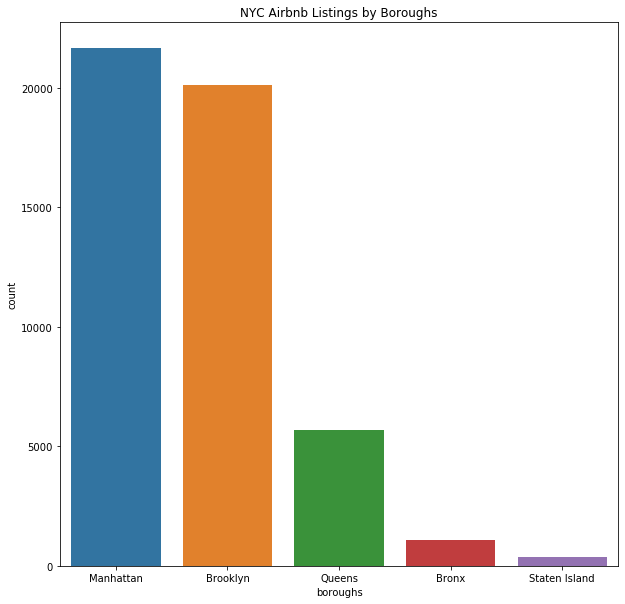

In [7]:
plt.subplots(figsize=(10,10))
sns.countplot(data1.boroughs, order = data1['boroughs'].value_counts().index)
plt.title('NYC Airbnb Listings by Boroughs')
plt.show()

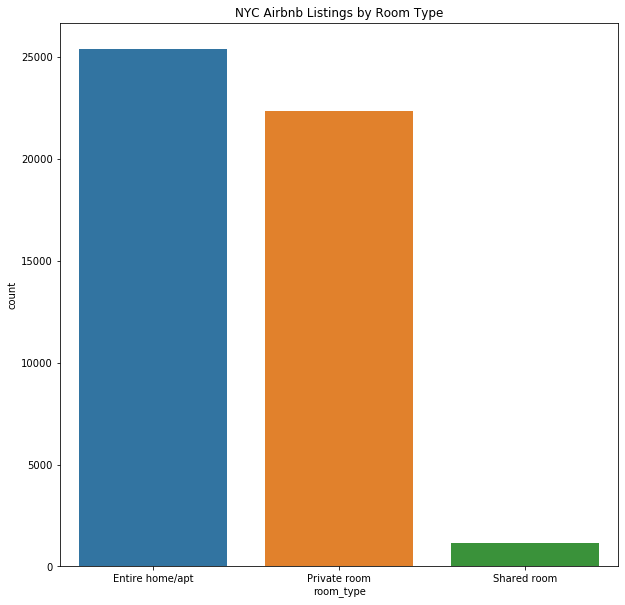

In [8]:
plt.subplots(figsize=(10,10))
sns.countplot(data1.room_type, order = data1['room_type'].value_counts().index)
plt.title('NYC Airbnb Listings by Room Type')
plt.show()

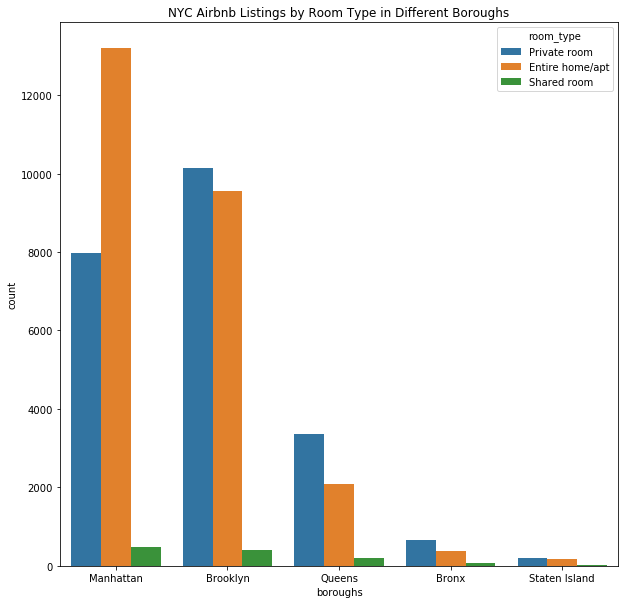

In [9]:
plt.subplots(figsize=(10,10))
sns.countplot(x='boroughs', hue='room_type', data=data1, order = data1['boroughs'].value_counts().index)
plt.title('NYC Airbnb Listings by Room Type in Different Boroughs')
plt.show()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


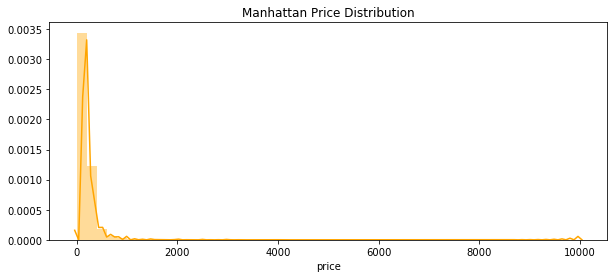

In [10]:
plt.figure(figsize=(10,4))
plt.title('Manhattan Price Distribution')
sns.distplot(data1[data1.boroughs=='Manhattan']['price'], color='orange',label='Manhattan')
plt.show()

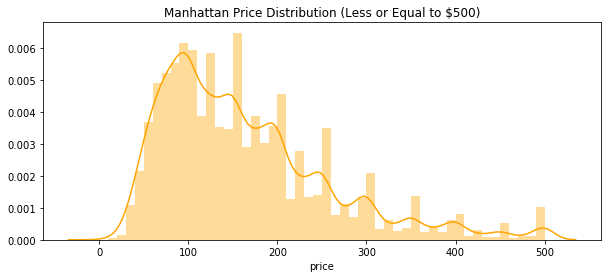

In [11]:
plt.figure(figsize=(10,4))
plt.title('Manhattan Price Distribution (Less or Equal to $500)')
sns.distplot(data1[(data1.boroughs=='Manhattan') & (data1.price <= 500)]['price'], color='orange',label='Manhattan')
plt.show()

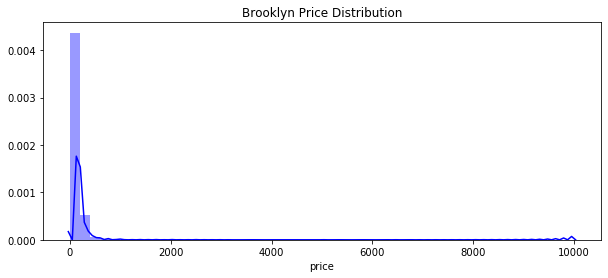

In [12]:
#Price distribution
plt.figure(figsize=(10,4))
plt.title('Brooklyn Price Distribution')
sns.distplot(data1[data1.boroughs=='Brooklyn']['price'], color='blue',label='Brooklyn')
plt.show()

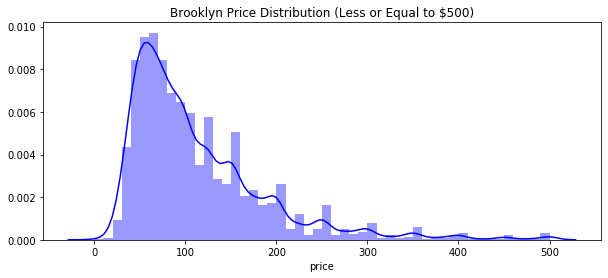

In [13]:
plt.figure(figsize=(10,4))
plt.title('Brooklyn Price Distribution (Less or Equal to $500)')
sns.distplot(data1[(data1.boroughs=='Brooklyn') & (data1.price <= 500)]['price'], color='blue',label='Brooklyn')
plt.show()

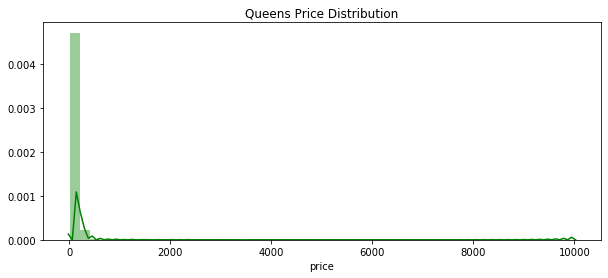

In [14]:
plt.figure(figsize=(10,4))
plt.title('Queens Price Distribution')
sns.distplot(data1[data1.boroughs=='Queens']['price'], color='green',label='Queens')
plt.show()

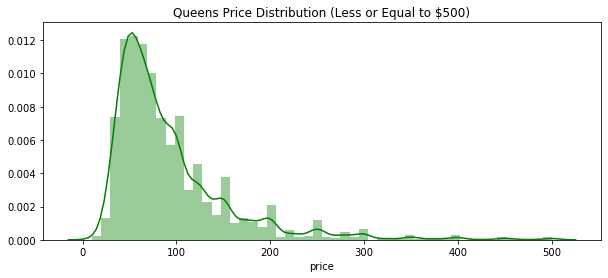

In [15]:
plt.figure(figsize=(10,4))
plt.title('Queens Price Distribution (Less or Equal to $500)')
sns.distplot(data1[(data1.boroughs=='Queens') & (data1.price <= 500)]['price'], color='green',label='Queens')
plt.show()

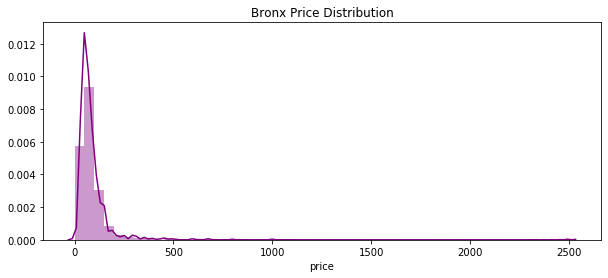

In [16]:
plt.figure(figsize=(10,4))
plt.title('Bronx Price Distribution')
sns.distplot(data1[data1.boroughs=='Bronx']['price'], color='purple',label='Bronx')
plt.show()

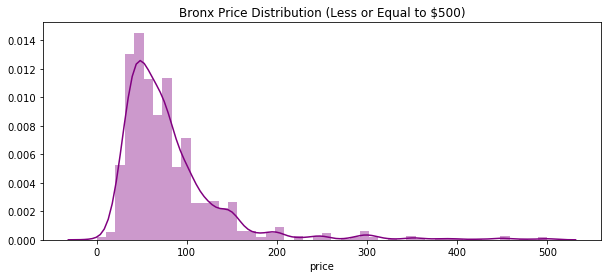

In [17]:
plt.figure(figsize=(10,4))
plt.title('Bronx Price Distribution (Less or Equal to $500)')
sns.distplot(data1[(data1.boroughs=='Bronx') & (data1.price <= 500)]['price'], color='purple',label='Bronx')
plt.show()

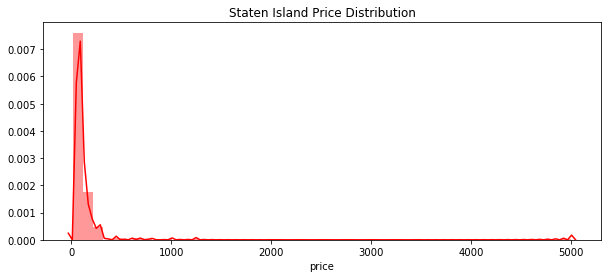

In [18]:
plt.figure(figsize=(10,4))
plt.title('Staten Island Price Distribution')
sns.distplot(data1[data1.boroughs=='Staten Island']['price'], color='red',label='Staten Island')
plt.show()

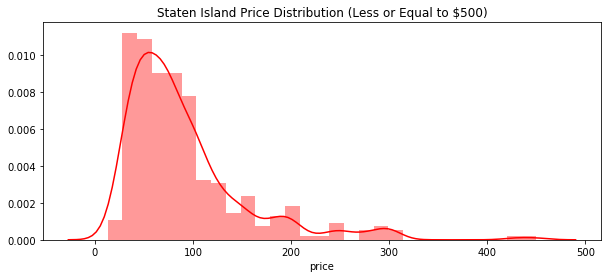

In [19]:
plt.figure(figsize=(10,4))
plt.title('Staten Island Price Distribution (Less or Equal to $500)')
sns.distplot(data1[(data1.boroughs=='Staten Island') & (data1.price <= 500)]['price'], color='red',label='Staten Island')
plt.show()

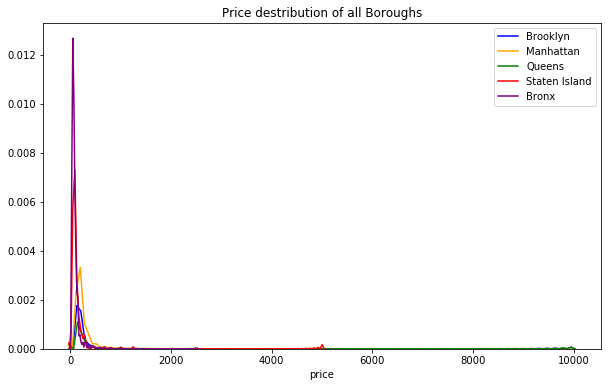

In [20]:
plt.figure(figsize=(10,6))
sns.distplot(data1[data1.boroughs=='Brooklyn']['price'], color='blue', hist=False, label='Brooklyn')
sns.distplot(data1[data1.boroughs=='Manhattan']['price'], color='orange', hist=False, label='Manhattan')
sns.distplot(data1[data1.boroughs=='Queens']['price'], color='green', hist=False, label='Queens')
sns.distplot(data1[data1.boroughs=='Staten Island']['price'], color='red', hist=False, label='Staten Island')
sns.distplot(data1[data1.boroughs=='Bronx']['price'], color='purple', hist=False, label='Bronx')
plt.title('Price destribution of all Boroughs')
plt.show()

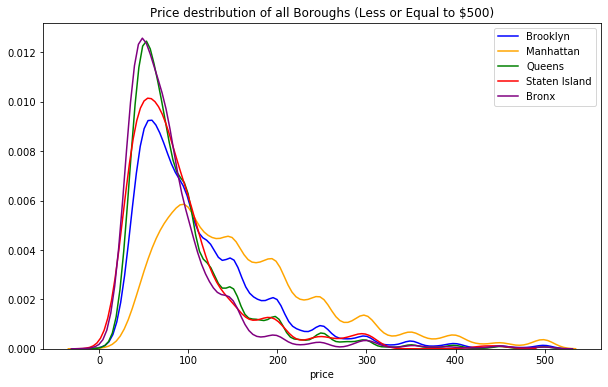

In [21]:
plt.figure(figsize=(10,6))
sns.distplot(data1[(data1.boroughs=='Brooklyn') & (data1.price <= 500)]['price'], color='blue', hist=False, label='Brooklyn')
sns.distplot(data1[(data1.boroughs=='Manhattan') & (data1.price <= 500)]['price'], color='orange', hist=False, label='Manhattan')
sns.distplot(data1[(data1.boroughs=='Queens') & (data1.price <= 500)]['price'], color='green', hist=False, label='Queens')
sns.distplot(data1[(data1.boroughs=='Staten Island') & (data1.price <= 500)]['price'], color='red', hist=False, label='Staten Island')
sns.distplot(data1[(data1.boroughs=='Bronx') & (data1.price <= 500)]['price'], color='purple', hist=False, label='Bronx')
plt.title('Price destribution of all Boroughs (Less or Equal to $500)')
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

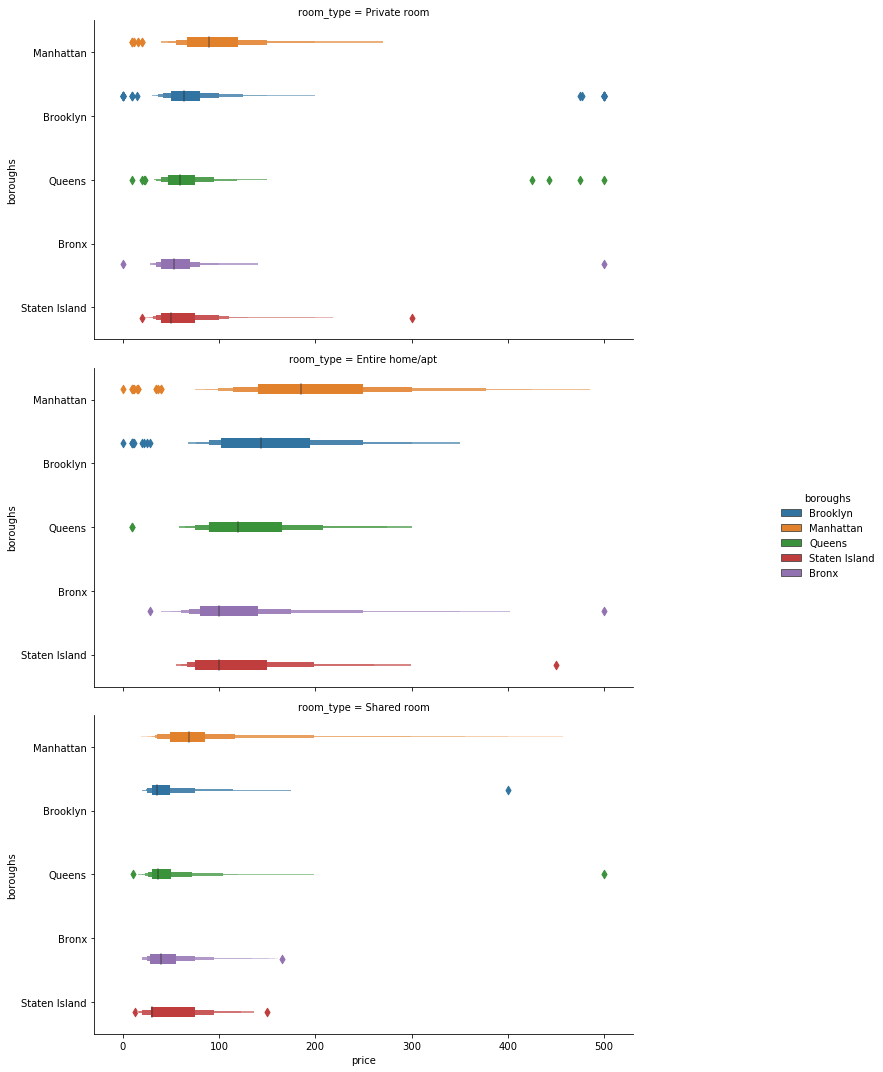

In [22]:
#Find out the price distribution of boroughs with price below $300/night
pd1=sns.catplot(x='price', y='boroughs', hue='boroughs', row='room_type', 
                data=data1[data1.price<=500],
                orient='h', kind='boxen', order=['Manhattan', 'Brooklyn', 'Queens', 'Bronx', 'Staten Island'])
pd1.fig.set_size_inches(15,15)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

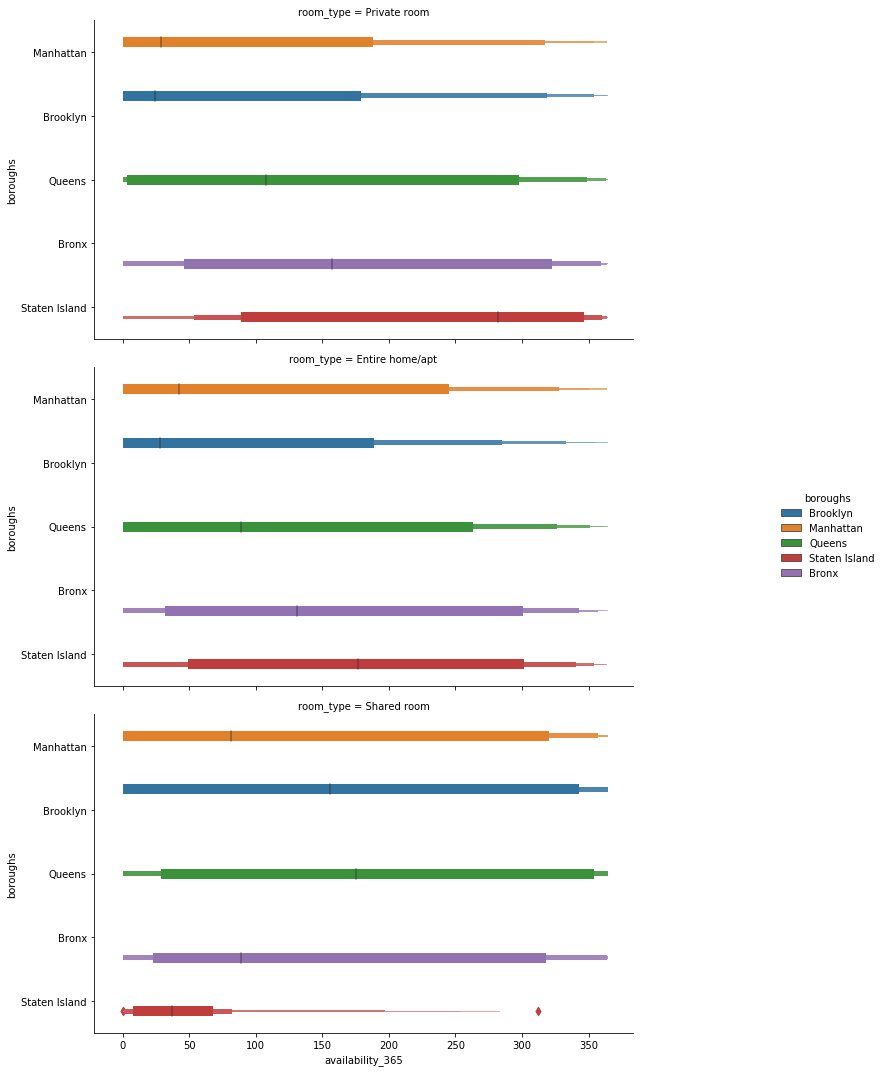

In [23]:
#Distribution of availability
pd1=sns.catplot(x='availability_365', y='boroughs', hue='boroughs', row='room_type', 
                data=data1,orient='h', kind='boxen', order=['Manhattan', 'Brooklyn', 'Queens', 'Bronx', 'Staten Island'])
pd1.fig.set_size_inches(15,15)

Text(0.5, 1.0, 'Correlation between Price and Availability of NYC Airbnb')

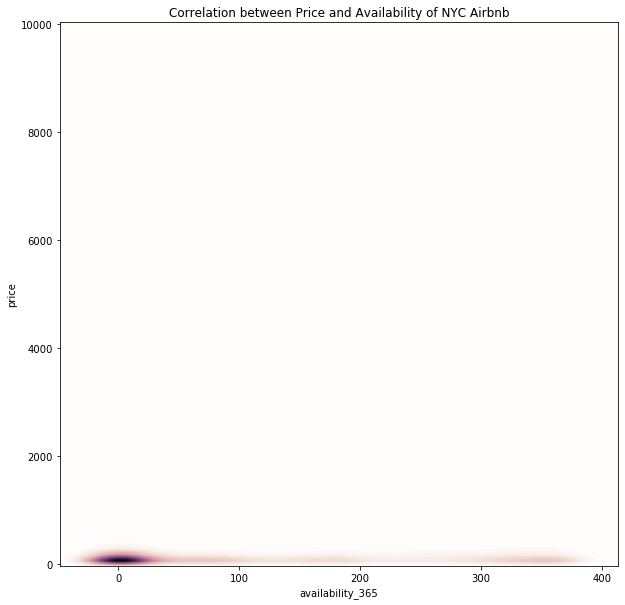

In [24]:
#Correlation between price and availability
plt.subplots(figsize=(10, 10))
cmap = sns.cubehelix_palette(as_cmap=True, dark=1, light=0, reverse=True)
sns.kdeplot(data1.availability_365, data1.price, cmap=cmap, n_levels=60, shade=True);
plt.title('Correlation between Price and Availability of NYC Airbnb')

Text(0.5, 1.0, 'Correlation between Price and Availability of NYC Airbnb')

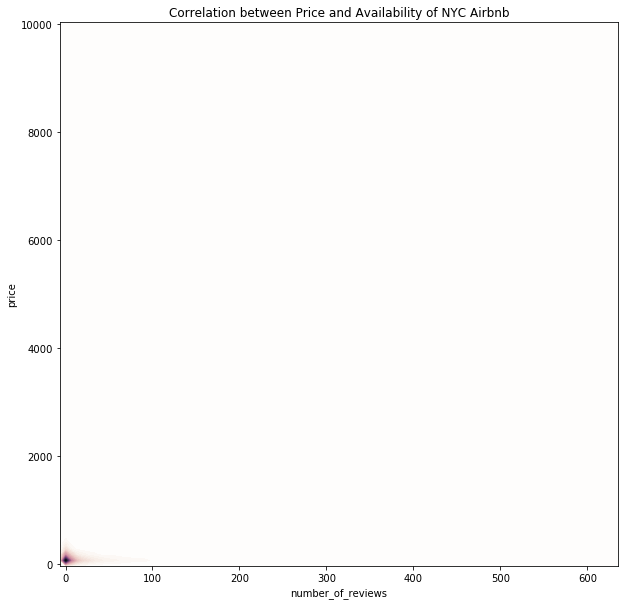

In [25]:
plt.subplots(figsize=(10, 10))
cmap = sns.cubehelix_palette(as_cmap=True, dark=1, light=0, reverse=True)
sns.kdeplot(data1.number_of_reviews, data1.price, cmap=cmap, n_levels=60, shade=True);
plt.title('Correlation between Price and Availability of NYC Airbnb')

In [26]:
#Create a basemap of NYC from the NYC public data
nycboros = gpd.read_file(gpd.datasets.get_path('nybb'))
nycbond = nycboros.to_crs(epsg=3857)
nycboros.head()

BoroCode       BoroName     Shape_Leng    Shape_Area  \
0         5  Staten Island  330470.010332  1.623820e+09   
1         4         Queens  896344.047763  3.045213e+09   
2         3       Brooklyn  741080.523166  1.937479e+09   
3         1      Manhattan  359299.096471  6.364715e+08   
4         2          Bronx  464392.991824  1.186925e+09   

                                            geometry  
0  MULTIPOLYGON (((970217.022 145643.332, 970227....  
1  MULTIPOLYGON (((1029606.077 156073.814, 102957...  
2  MULTIPOLYGON (((1021176.479 151374.797, 102100...  
3  MULTIPOLYGON (((981219.056 188655.316, 980940....  
4  MULTIPOLYGON (((1012821.806 229228.265, 101278...

In [27]:
#Create a base map of NYC using folium
def generateBaseMap(default_location=[40.7, -74.0], default_zoom_start=12):
    base_map = folium.Map(location=default_location, control_scale=True, zoom_start=default_zoom_start)
    return base_map

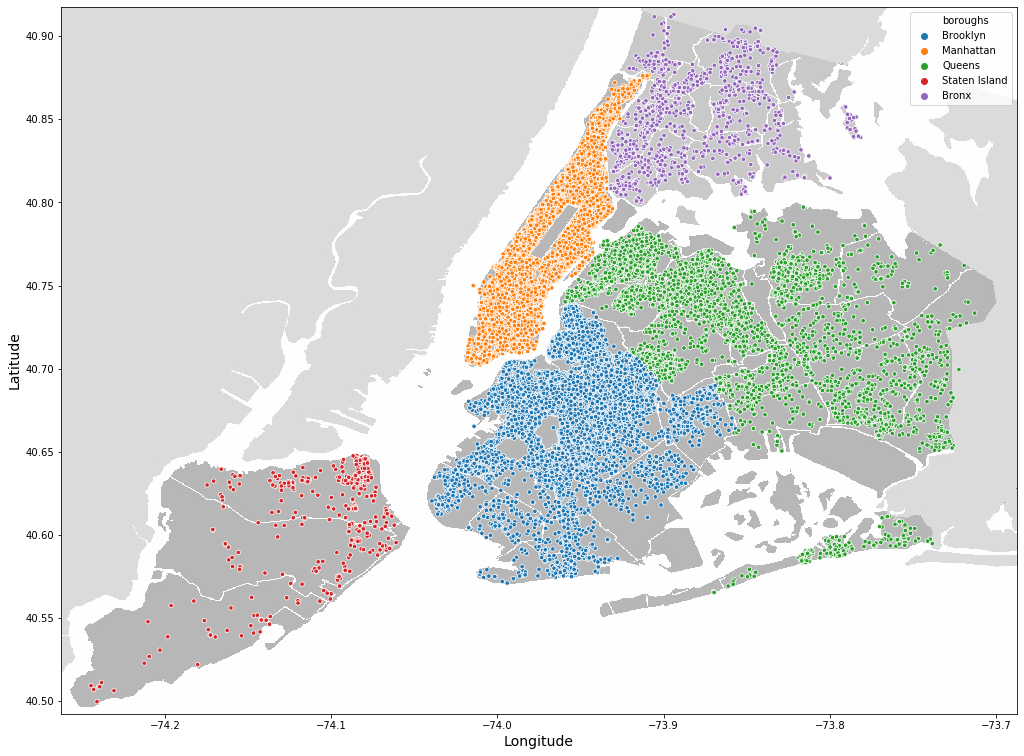

In [28]:
#Show the listings in different colors
nyc_img = mplimg.imread('New_York_City.png',0)
plt.figure(figsize=(20,13))
listmap = sns.scatterplot(x='longitude', y='latitude', hue='boroughs',s=20, data=data1)
plt.imshow(nyc_img,  extent= [-74.2625, -73.6875, 40.4925, 40.9175], alpha=0.5)
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)
plt.show()

In [29]:
borocount = data1.groupby('boroughs').agg('count').reset_index()
nycboros.rename(columns={'BoroName':'boroughs'}, inplace=True)
borogeo = nycboros.merge(borocount, on='boroughs')
borogeo

BoroCode       boroughs     Shape_Leng    Shape_Area  \
0         5  Staten Island  330470.010332  1.623820e+09   
1         4         Queens  896344.047763  3.045213e+09   
2         3       Brooklyn  741080.523166  1.937479e+09   
3         1      Manhattan  359299.096471  6.364715e+08   
4         2          Bronx  464392.991824  1.186925e+09   

                                            geometry     id   name  host_id  \
0  MULTIPOLYGON (((970217.022 145643.332, 970227....    373    373      373   
1  MULTIPOLYGON (((1029606.077 156073.814, 102957...   5666   5666     5666   
2  MULTIPOLYGON (((1021176.479 151374.797, 102100...  20104  20104    20104   
3  MULTIPOLYGON (((981219.056 188655.316, 980940....  21661  21661    21661   
4  MULTIPOLYGON (((1012821.806 229228.265, 101278...   1091   1091     1091   

   host_name  neighborhood  latitude  longitude  room_type  price  \
0        373           373       373        373        373    373   
1       5666          5666      5666       5666       5666   5666   
2      20104         20104     20104      20104      20104  20104   
3      21661         21661     21661      21661      21661  21661   
4       1091          1091      1091       1091       1091   1091   

   minimum_nights  number_of_reviews  reviews_per_month  \
0             373                373                373   
1            5666               5666               5666   
2           20104              20104              20104   
3           21661              21661              21661   
4            1091               1091               1091   

   calculated_host_listings_count  availability_365  
0                             373               373  
1                            5666              5666  
2                           20104             20104  
3                           21661             21661  
4                            1091              1091

In [30]:
#Create a heatmap showing the density of the listing
densitymap = generateBaseMap()
HeatMap(data1[['latitude','longitude']].groupby(['latitude','longitude']).sum().reset_index().values.tolist(), radius=8, max_zoom=16).add_to(densitymap)
densitymap

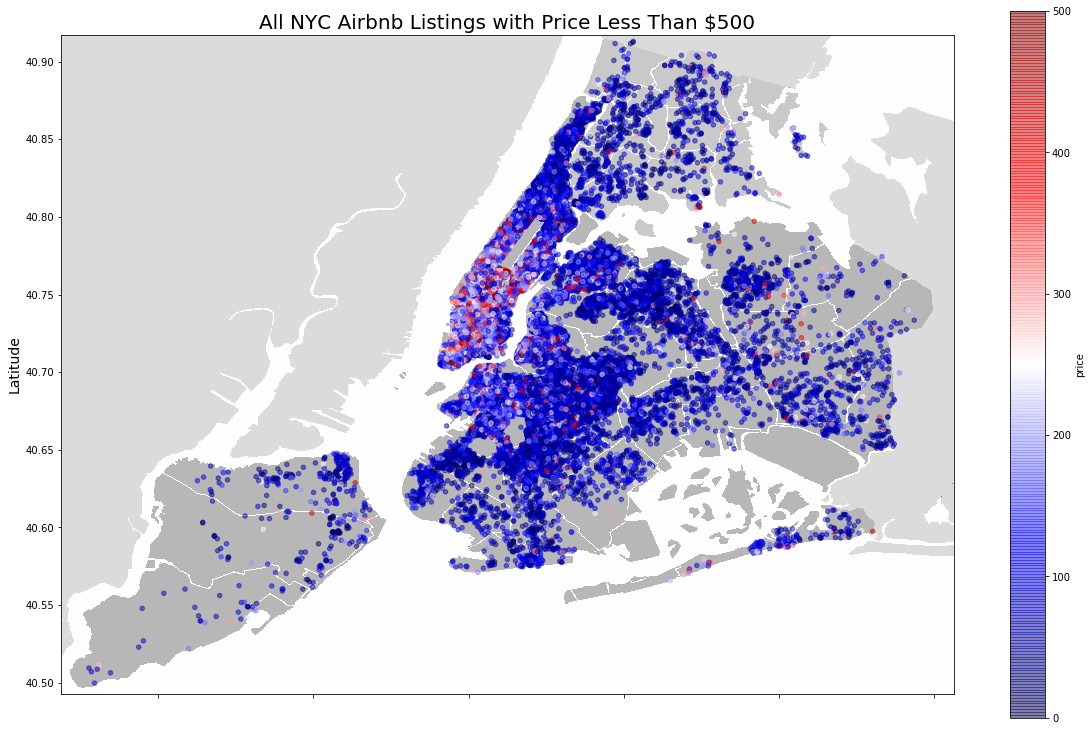

In [31]:
data1[data1.price<=500].plot(kind='scatter', x='longitude',y='latitude',c='price',cmap=plt.get_cmap('seismic'),colorbar=True,alpha=0.5,figsize=(20,13))
plt.title("All NYC Airbnb Listings with Price Less Than $500", fontsize=20)
plt.imshow(nyc_img,  extent= [-74.2625, -73.6875, 40.4925, 40.9175], alpha=0.5)
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)
plt.show()
plt.ioff()

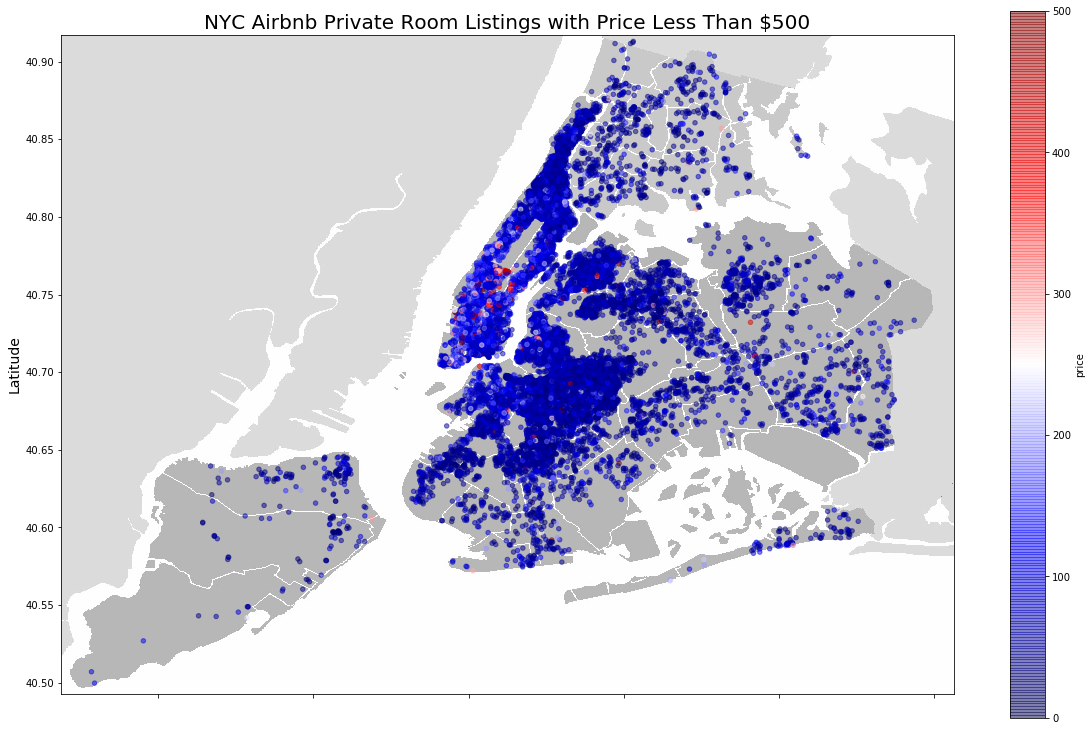

In [32]:
private1 = data1[(data1.room_type == 'Private room') & (data1.price <= 500)]
privatemap = private1.plot(kind='scatter', x='longitude', y='latitude', c='price',cmap=plt.get_cmap('seismic'),colorbar=True,alpha=0.5, figsize=(20,13))
plt.title("NYC Airbnb Private Room Listings with Price Less Than $500", fontsize=20)
plt.imshow(nyc_img,  extent= [-74.2625, -73.6875, 40.4925, 40.9175], alpha=0.5)
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)
plt.show()

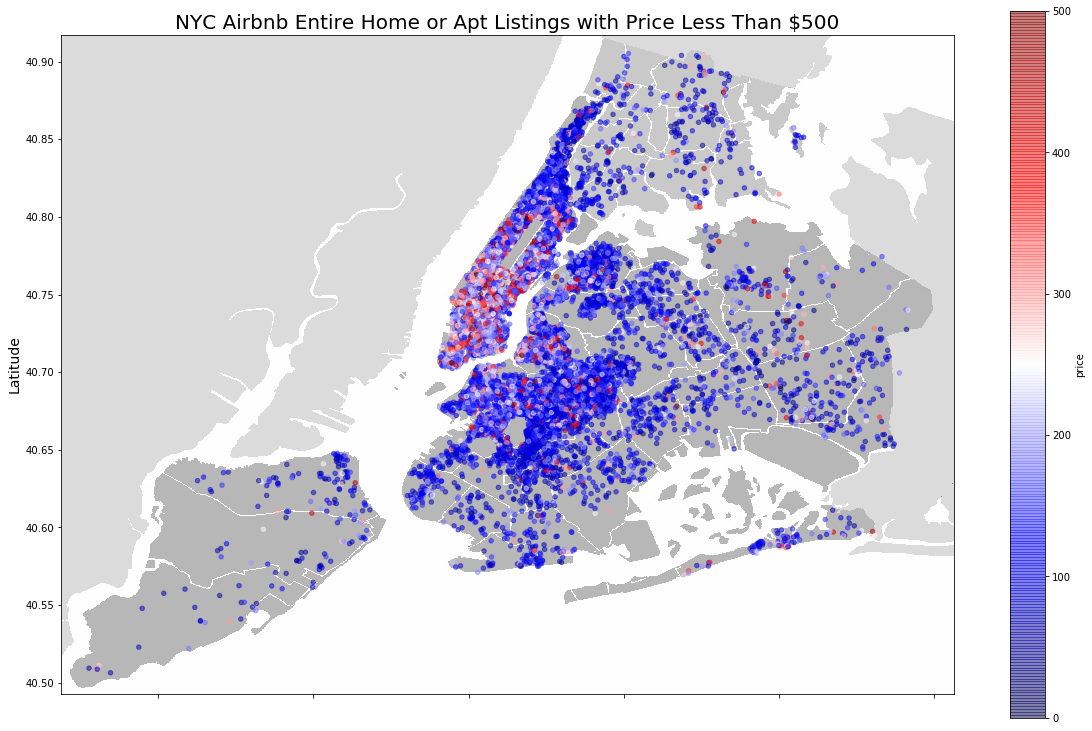

In [33]:
private2 = data1[(data1.room_type == 'Entire home/apt') & (data1.price <= 500)]
privatemap2 = private2.plot(kind='scatter', x='longitude', y='latitude', c='price',cmap=plt.get_cmap('seismic'),colorbar=True,alpha=0.5,figsize=(20,13))
plt.title("NYC Airbnb Entire Home or Apt Listings with Price Less Than $500", fontsize=20)
plt.imshow(nyc_img,  extent= [-74.2625, -73.6875, 40.4925, 40.9175], alpha=0.5)
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)
plt.show()

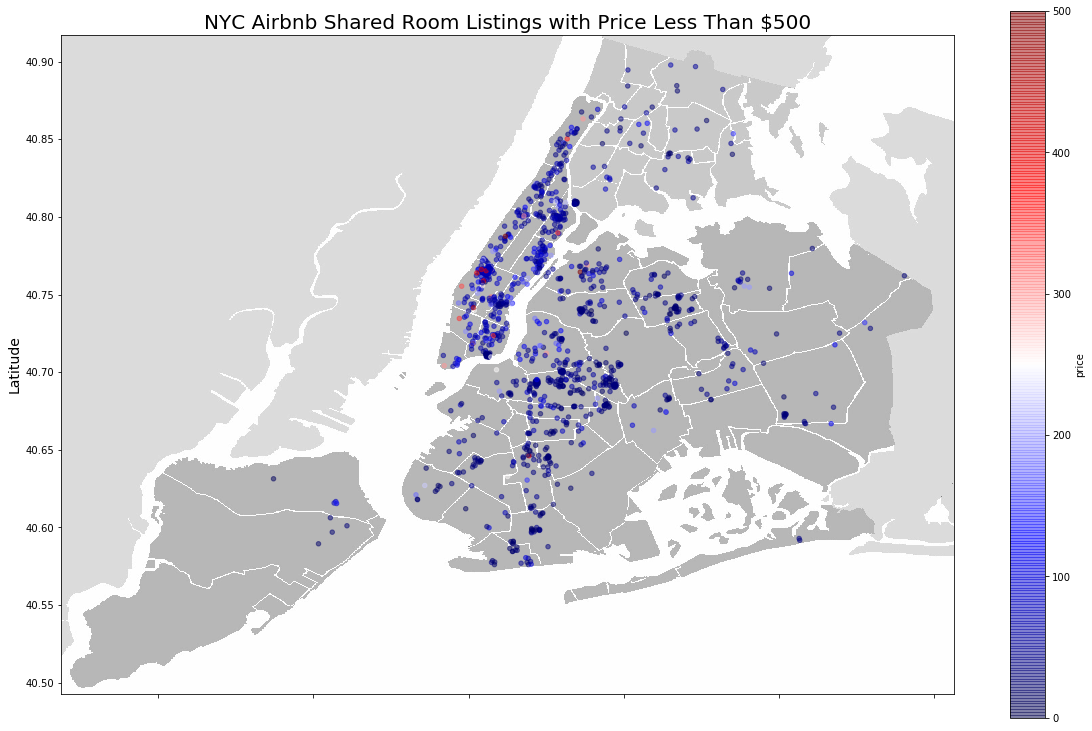

In [34]:
private3 = data1[(data1.room_type == 'Shared room') & (data1.price <= 500)]
privatemap3 = private3.plot(kind='scatter', x='longitude', y='latitude', c='price',cmap=plt.get_cmap('seismic'),colorbar=True,alpha=0.5,figsize=(20,13))
plt.title("NYC Airbnb Shared Room Listings with Price Less Than $500", fontsize=20)
plt.imshow(nyc_img,  extent= [-74.2625, -73.6875, 40.4925, 40.9175], alpha=0.5)
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)
plt.show()

In [35]:
#Import neighborhood geo data
nbhgeo = pd.read_csv('nynta.csv')
nbhgeo.head()

the_geom  BoroCode  BoroName  \
0  MULTIPOLYGON (((-73.94732672160586 40.62916656...         3  Brooklyn   
1  MULTIPOLYGON (((-73.94193078816201 40.70072523...         3  Brooklyn   
2  MULTIPOLYGON (((-73.89138023380268 40.86170058...         2     Bronx   
3  MULTIPOLYGON (((-73.9760493559142 40.631275905...         3  Brooklyn   
4  MULTIPOLYGON (((-73.90855790522774 40.65209593...         3  Brooklyn   

   CountyFIPS NTACode               NTAName    Shape_Leng    Shape_Area  
0          47    BK43               Midwood  27996.591274  3.579964e+07  
1          47    BK75               Bedford  29992.919174  3.262983e+07  
2           5    BX40         Fordham South  15878.272921  6.307284e+06  
3          47    BK88          Borough Park  39247.227722  5.400502e+07  
4          47    BK96  Rugby-Remsen Village  30957.853395  3.270695e+07

In [36]:
#Rename the column for later join
nbhgeo.rename(columns={'NTAName':'neighborhood','BoroName':'boroughs'}, inplace=True)
#Convert the geometry column text into text
nbhgeo['geom'] = nbhgeo['the_geom'].apply(wkt.loads)
#Convert dataframe into geodataframe
nbhgeo = gpd.GeoDataFrame(nbhgeo, geometry='geom')
nbhgeo

the_geom  BoroCode  boroughs  \
0    MULTIPOLYGON (((-73.94732672160586 40.62916656...         3  Brooklyn   
1    MULTIPOLYGON (((-73.94193078816201 40.70072523...         3  Brooklyn   
2    MULTIPOLYGON (((-73.89138023380268 40.86170058...         2     Bronx   
3    MULTIPOLYGON (((-73.9760493559142 40.631275905...         3  Brooklyn   
4    MULTIPOLYGON (((-73.90855790522774 40.65209593...         3  Brooklyn   
..                                                 ...       ...       ...   
190  MULTIPOLYGON (((-73.91191812320277 40.84325788...         2     Bronx   
191  MULTIPOLYGON (((-73.83103141767994 40.71433672...         4    Queens   
192  MULTIPOLYGON (((-73.86522555434871 40.57045847...         4    Queens   
193  MULTIPOLYGON (((-73.75763129618157 40.66645115...         4    Queens   
194  MULTIPOLYGON (((-73.74712154262478 40.63716227...         4    Queens   

     CountyFIPS NTACode                          neighborhood     Shape_Leng  \
0            47    BK43                               Midwood   27996.591274   
1            47    BK75                               Bedford   29992.919174   
2             5    BX40                         Fordham South   15878.272921   
3            47    BK88                          Borough Park   39247.227722   
4            47    BK96                  Rugby-Remsen Village   30957.853395   
..          ...     ...                                   ...            ...   
190           5    BX63                        West Concourse   28550.700370   
191          81    QN17                          Forest Hills   36183.607827   
192          81    QN99              park-cemetery-etc-Queens  490146.604020   
193          81    QN03  Springfield Gardens South-Brookville   45266.267875   
194          81    QN98                               Airport  134833.935261   

       Shape_Area                                               geom  
0    3.579964e+07  MULTIPOLYGON (((-73.94733 40.62917, -73.94687 ...  
1    3.262983e+07  MULTIPOLYGON (((-73.94193 40.70073, -73.94439 ...  
2    6.307284e+06  MULTIPOLYGON (((-73.89138 40.86170, -73.89106 ...  
3    5.400502e+07  MULTIPOLYGON (((-73.97605 40.63128, -73.97717 ...  
4    3.270695e+07  MULTIPOLYGON (((-73.90856 40.65210, -73.90945 ...  
..            ...                                                ...  
190  1.936954e+07  MULTIPOLYGON (((-73.91192 40.84326, -73.91194 ...  
191  5.782845e+07  MULTIPOLYGON (((-73.83103 40.71434, -73.83115 ...  
192  3.116850e+08  MULTIPOLYGON (((-73.86523 40.57046, -73.86454 ...  
193  4.326375e+07  MULTIPOLYGON (((-73.75763 40.66645, -73.75756 ...  
194  2.277617e+08  MULTIPOLYGON (((-73.74712 40.63716, -73.74707 ...  

[195 rows x 9 columns]

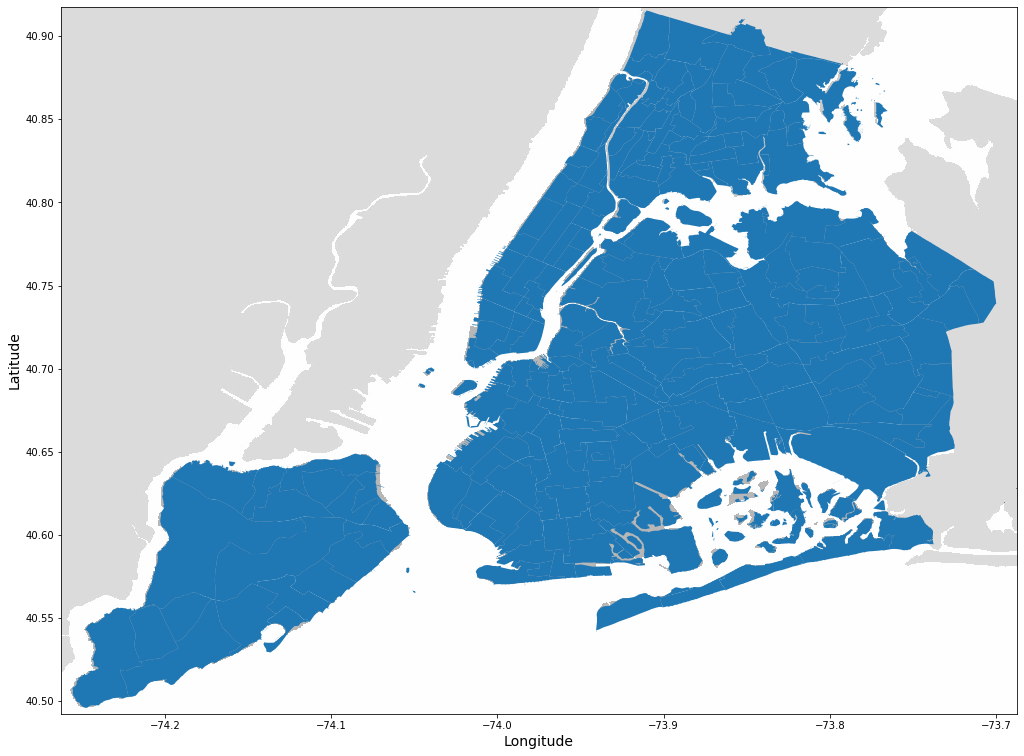

In [37]:
#Plot neighborhood geodata
f,ax = plt.subplots(figsize=(20,13))
nbhgeo.plot(ax=ax)
plt.imshow(nyc_img,  extent= [-74.2625, -73.6875, 40.4925, 40.9175], alpha=0.5)
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)
plt.show()

In [38]:
nbh_count = data1.groupby('neighborhood').agg('count').reset_index()
nbh_count_geo = nbhgeo.merge(nbh_count, on='neighborhood')
nbh_count_geo

the_geom  BoroCode boroughs_x  \
0   MULTIPOLYGON (((-73.94732672160586 40.62916656...         3   Brooklyn   
1   MULTIPOLYGON (((-73.9760493559142 40.631275905...         3   Brooklyn   
2   MULTIPOLYGON (((-73.84913837242911 40.69828274...         4     Queens   
3   MULTIPOLYGON (((-73.80379022888253 40.77561011...         4     Queens   
4   MULTIPOLYGON (((-73.86109724401761 40.76366447...         4     Queens   
..                                                ...       ...        ...   
64  MULTIPOLYGON (((-73.97849845639811 40.73679095...         1  Manhattan   
65  MULTIPOLYGON (((-73.95337017508868 40.68064050...         3   Brooklyn   
66  MULTIPOLYGON (((-73.9502369375792 40.705473246...         3   Brooklyn   
67  MULTIPOLYGON (((-73.91728719351073 40.84510408...         2      Bronx   
68  MULTIPOLYGON (((-73.83103141767994 40.71433672...         4     Queens   

    CountyFIPS NTACode   neighborhood    Shape_Leng    Shape_Area  \
0           47    BK43        Midwood  27996.591274  3.579964e+07   
1           47    BK88   Borough Park  39247.227722  5.400502e+07   
2           81    QN53      Woodhaven  28070.585548  3.700132e+07   
3           81    QN51    Murray Hill  33266.904811  5.248828e+07   
4           81    QN27  East Elmhurst  19816.712110  1.972685e+07   
..         ...     ...            ...           ...           ...   
64          61    MN21       Gramercy  12091.587932  7.531455e+06   
65          47    BK69   Clinton Hill  23971.461410  2.052814e+07   
66          47    BK72   Williamsburg  16874.433579  1.158999e+07   
67           5    BX26     Highbridge  18507.423928  1.645723e+07   
68          81    QN17   Forest Hills  36183.607827  5.782845e+07   

                                                 geom    id  ...  boroughs_y  \
0   MULTIPOLYGON (((-73.94733 40.62917, -73.94687 ...   109  ...         109   
1   MULTIPOLYGON (((-73.97605 40.63128, -73.97717 ...   136  ...         136   
2   MULTIPOLYGON (((-73.84914 40.69828, -73.84948 ...    88  ...          88   
3   MULTIPOLYGON (((-73.80379 40.77561, -73.80099 ...   485  ...         485   
4   MULTIPOLYGON (((-73.86110 40.76366, -73.85993 ...   185  ...         185   
..                                                ...   ...  ...         ...   
64  MULTIPOLYGON (((-73.97850 40.73679, -73.97857 ...   338  ...         338   
65  MULTIPOLYGON (((-73.95337 40.68064, -73.95328 ...   572  ...         572   
66  MULTIPOLYGON (((-73.95024 40.70547, -73.94984 ...  3920  ...        3920   
67  MULTIPOLYGON (((-73.91729 40.84510, -73.91732 ...    27  ...          27   
68  MULTIPOLYGON (((-73.83103 40.71434, -73.83115 ...   144  ...         144   

    latitude  longitude  room_type  price  minimum_nights  number_of_reviews  \
0        109        109        109    109             109                109   
1        136        136        136    136             136                136   
2         88         88         88     88              88                 88   
3        485        485        485    485             485                485   
4        185        185        185    185             185                185   
..       ...        ...        ...    ...             ...                ...   
64       338        338        338    338             338                338   
65       572        572        572    572             572                572   
66      3920       3920       3920   3920            3920               3920   
67        27         27         27     27              27                 27   
68       144        144        144    144             144                144   

    reviews_per_month  calculated_host_listings_count  availability_365  
0                 109                             109               109  
1                 136                             136               136  
2                  88                              88                88  
3                 485                             485        

In [39]:
nbh_count

neighborhood   id  name  host_id  host_name  boroughs  latitude  \
0           Allerton   42    42       42         42        42        42   
1      Arden Heights    4     4        4          4         4         4   
2           Arrochar   21    21       21         21        21        21   
3            Arverne   77    77       77         77        77        77   
4            Astoria  900   900      900        900       900       900   
..               ...  ...   ...      ...        ...       ...       ...   
216  Windsor Terrace  157   157      157        157       157       157   
217        Woodhaven   88    88       88         88        88        88   
218         Woodlawn   11    11       11         11        11        11   
219          Woodrow    1     1        1          1         1         1   
220         Woodside  235   235      235        235       235       235   

     longitude  room_type  price  minimum_nights  number_of_reviews  \
0           42         42     42              42                 42   
1            4          4      4               4                  4   
2           21         21     21              21                 21   
3           77         77     77              77                 77   
4          900        900    900             900                900   
..         ...        ...    ...             ...                ...   
216        157        157    157             157                157   
217         88         88     88              88                 88   
218         11         11     11              11                 11   
219          1          1      1               1                  1   
220        235        235    235             235                235   

     reviews_per_month  calculated_host_listings_count  availability_365  
0                   42                              42                42  
1                    4                               4                 4  
2                   21                              21                21  
3                   77                              77                77  
4                  900                             900               900  
..                 ...                             ...               ...  
216                157                             157               157  
217                 88                              88                88  
218                 11                              11                11  
219                  1                               1                 1  
220                235                             235               235  

[221 rows x 15 columns]

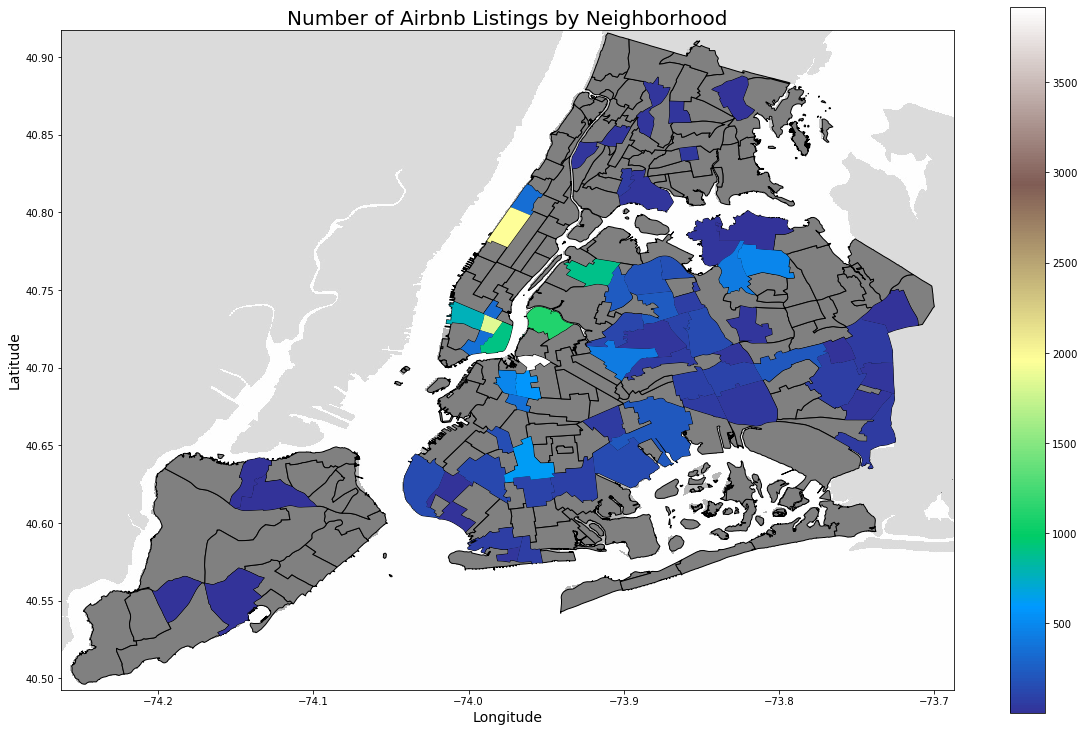

In [40]:
fig,ax = plt.subplots(figsize=(20,13))
base = nbhgeo.plot(color='grey', edgecolor='black', ax=ax)
nbh_count_geo.plot(column='id', cmap=plt.get_cmap('terrain'), ax=base, legend=True)
plt.title("Number of Airbnb Listings by Neighborhood", fontsize=20)
plt.imshow(nyc_img,  extent= [-74.2625, -73.6875, 40.4925, 40.9175], alpha=0.5)
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)
plt.show()